In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

2023-06-21 17:51:16.190348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
import os
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async" # for memory growth
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # disable GPU

# Memory growth must be set before GPUs have been initialized
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# List the available GPUs
devices = tf.config.list_physical_devices()
print("Available devices:\n", devices)
gpus = tf.config.list_physical_devices("GPU")
tf.config.set_visible_devices(gpus[0], "GPU")
logical_gpus = tf.config.experimental.list_logical_devices("GPU")
print("Using GPU:", logical_gpus[0].name)

1 Physical GPUs, 1 Logical GPUs
Available devices:
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Using GPU: /device:GPU:0


In [7]:
data = pd.read_csv('./data/train_data_isolate1.csv')

y = data['R']
X = data.drop(['R'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [8]:
print(X_test.shape)
print(X_train.shape)

(2178001, 4)
(8712001, 4)


In [9]:
model = keras.Sequential([
    keras.layers.Dense(4, activation='tanh', input_shape=(4,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(2, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.005, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 1  # Number of training iterations
batch_size = 256 # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-3)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)

27225/27225 [==============================] - 38s 1ms/step - loss: 1.4117e-04 - val_loss: 1.3574e-04 - lr: 0.0050


In [44]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(X_test)

9/9 [==============================] - 0s 702us/step - loss: 1.1963e-04
Test loss: 0.00011963149154325947


9/9 [==============================] - 0s 524us/step


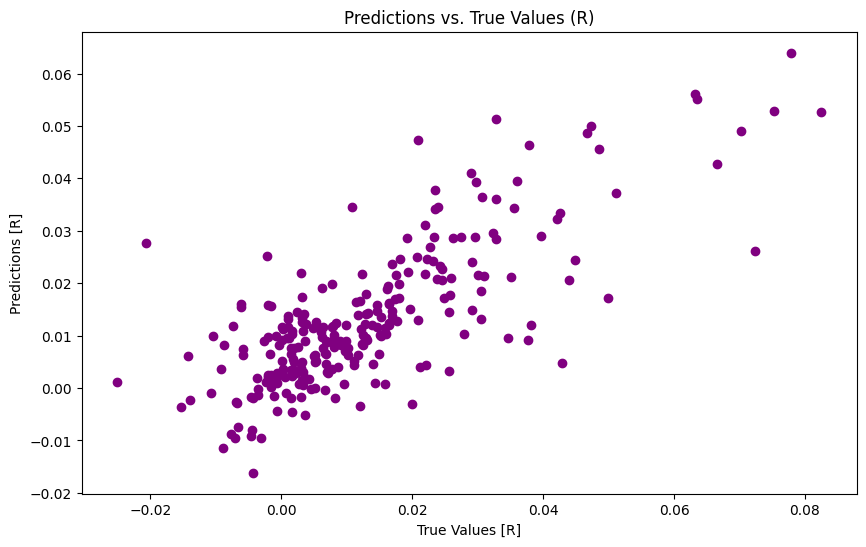

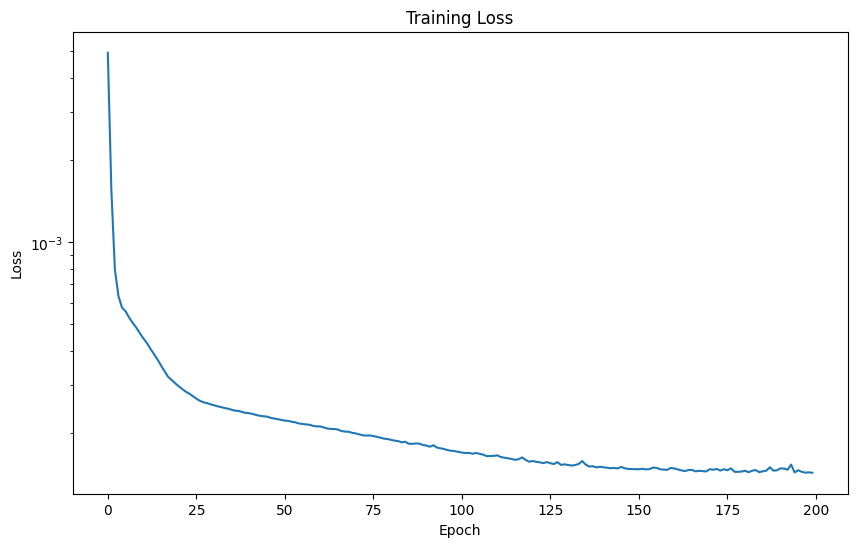

In [45]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(pd.DataFrame(y_test).iloc[:,0], predictions, color='purple')
plt.xlabel('True Values [R]')
plt.ylabel('Predictions [R]')
plt.title('Predictions vs. True Values (R)')
#plt.axis('equal')

# Plot the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

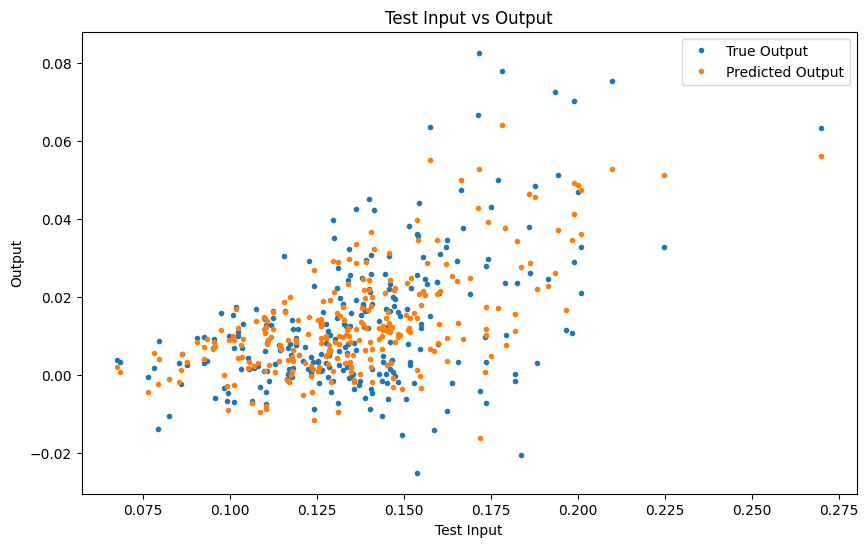

In [46]:
plt.figure(figsize=(10, 6))
#Plot the true output and the predicted output
plt.plot(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(y_test).iloc[:,0],'.', label='True Output')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Predicted Output')
plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Test Input vs Output')
plt.legend()
plt.show()

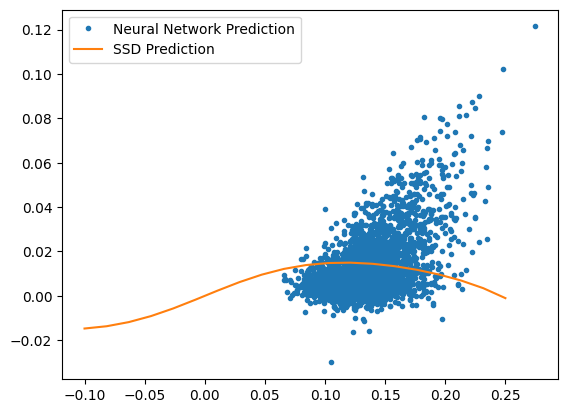

In [26]:
with open("./variables.pickle", "rb") as f:
    R_space, U_space = pickle.load(f)
    
#plt.plot(test_input[sorted_indices], predictions[sorted_indices], label='Neural Network Prediction')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Neural Network Prediction')
plt.plot(U_space, R_space, label='SSD Prediction')
#plt.ylim(0, 0.02)
plt.legend()
plt.show()

# SINE FUNCTION

In [51]:
data = pd.read_csv('./data/sinx_train_features.csv')
y = data['y']
X = data.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [52]:
X_test.shape

(14994, 6)

In [54]:
model = keras.Sequential([
    keras.layers.Dense(6, activation='tanh', input_shape=(6,), kernel_initializer='glorot_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.005)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
epochs = 10  # Number of training iterations
batch_size = 128 # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-4)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(X_test)

Epoch 1/10


246/246 [==============================] - 1s 2ms/step - loss: 0.0185 - mae: 0.0982 - val_loss: 0.0056 - val_mae: 0.0597 - lr: 0.0050
Epoch 2/10
246/246 [==============================] - 0s 2ms/step - loss: 0.0059 - mae: 0.0616 - val_loss: 0.0056 - val_mae: 0.0594 - lr: 0.0050
Epoch 3/10
246/246 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0603 - val_loss: 0.0056 - val_mae: 0.0598 - lr: 0.0050
Epoch 4/10
246/246 [==============================] - 0s 2ms/step - loss: 0.0056 - mae: 0.0601 - val_loss: 0.0057 - val_mae: 0.0599 - lr: 0.0050
Epoch 5/10
246/246 [==============================] - 0s 2ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0056 - val_mae: 0.0595 - lr: 0.0025
Epoch 6/10
246/246 [==============================] - 0s 2ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0055 - val_mae: 0.0594 - lr: 0.0025
Epoch 7/10
246/246 [==============================] - 0s 2ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0055 - val_mae: 0.0594 - lr: 0.0

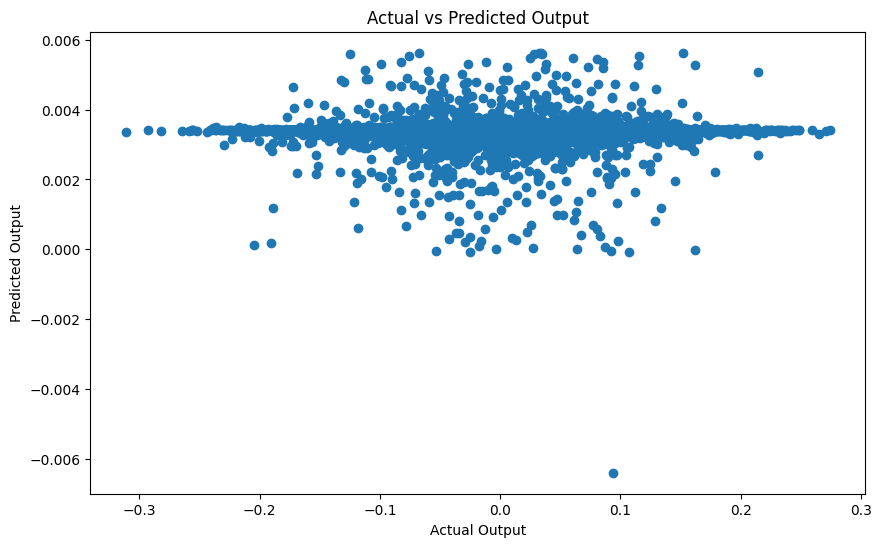

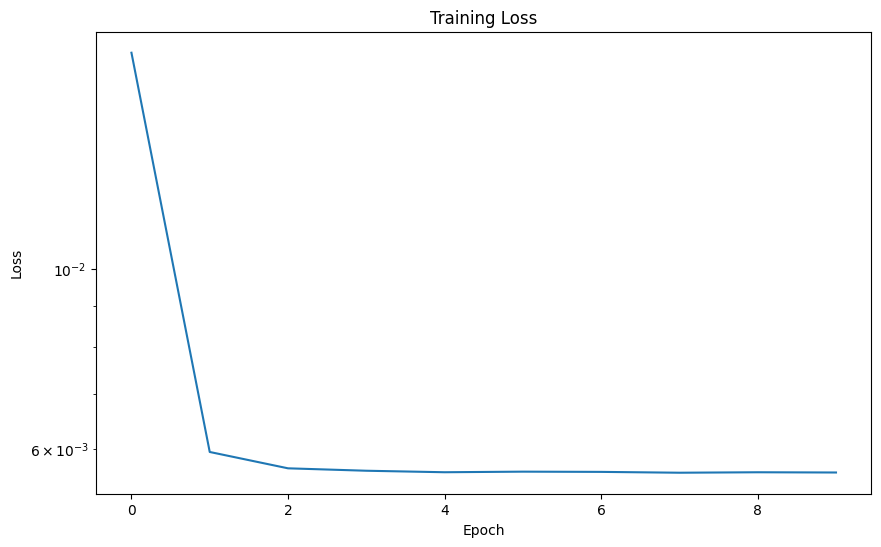

In [55]:
# Plotting the results

plt.figure(figsize=(10, 6))
plt.scatter(pd.DataFrame(y_test).iloc[:,0], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs Predicted Output')
plt.show()

plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

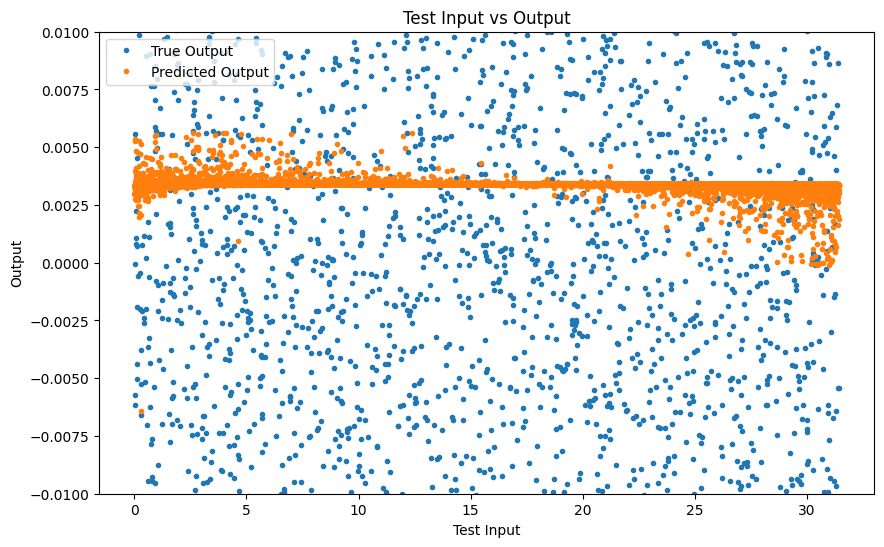

In [56]:
plt.figure(figsize=(10, 6))
#Plot the true output and the predicted output
plt.plot(pd.DataFrame(X_test).iloc[:,0], pd.DataFrame(y_test).iloc[:,0],'.', label='True Output')
plt.plot(pd.DataFrame(X_test).iloc[:,0], predictions,'.', label='Predicted Output')
plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Test Input vs Output')
plt.ylim(-0.01,0.01)
plt.legend()
plt.show()